In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Define the file path
file_path = r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Final Projects\WHO MORTALITY\Data\Cleaned Data\cleaned_life_expectancy_data.csv'

# Use Pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
df.head()


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

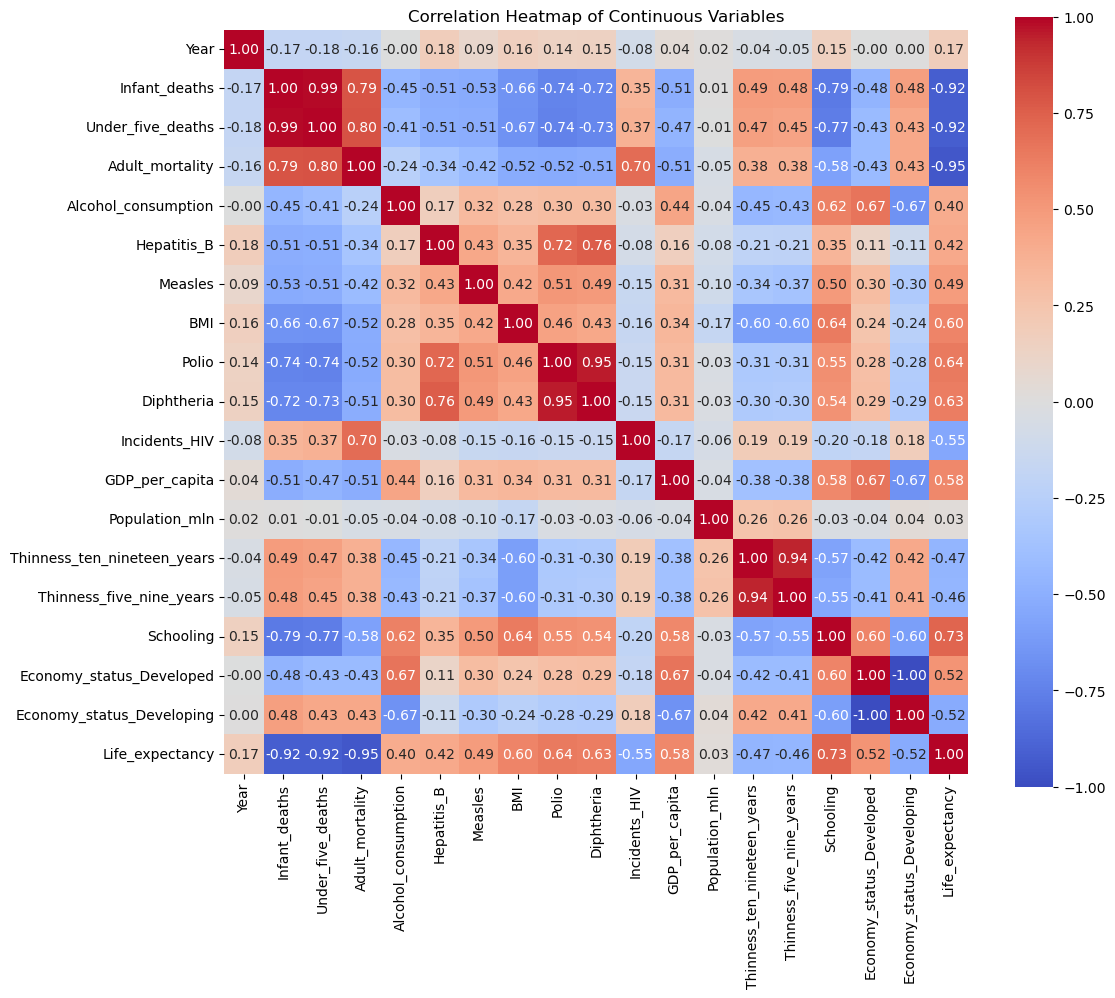

In [4]:
# Select only the quantitative continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = continuous_vars.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()


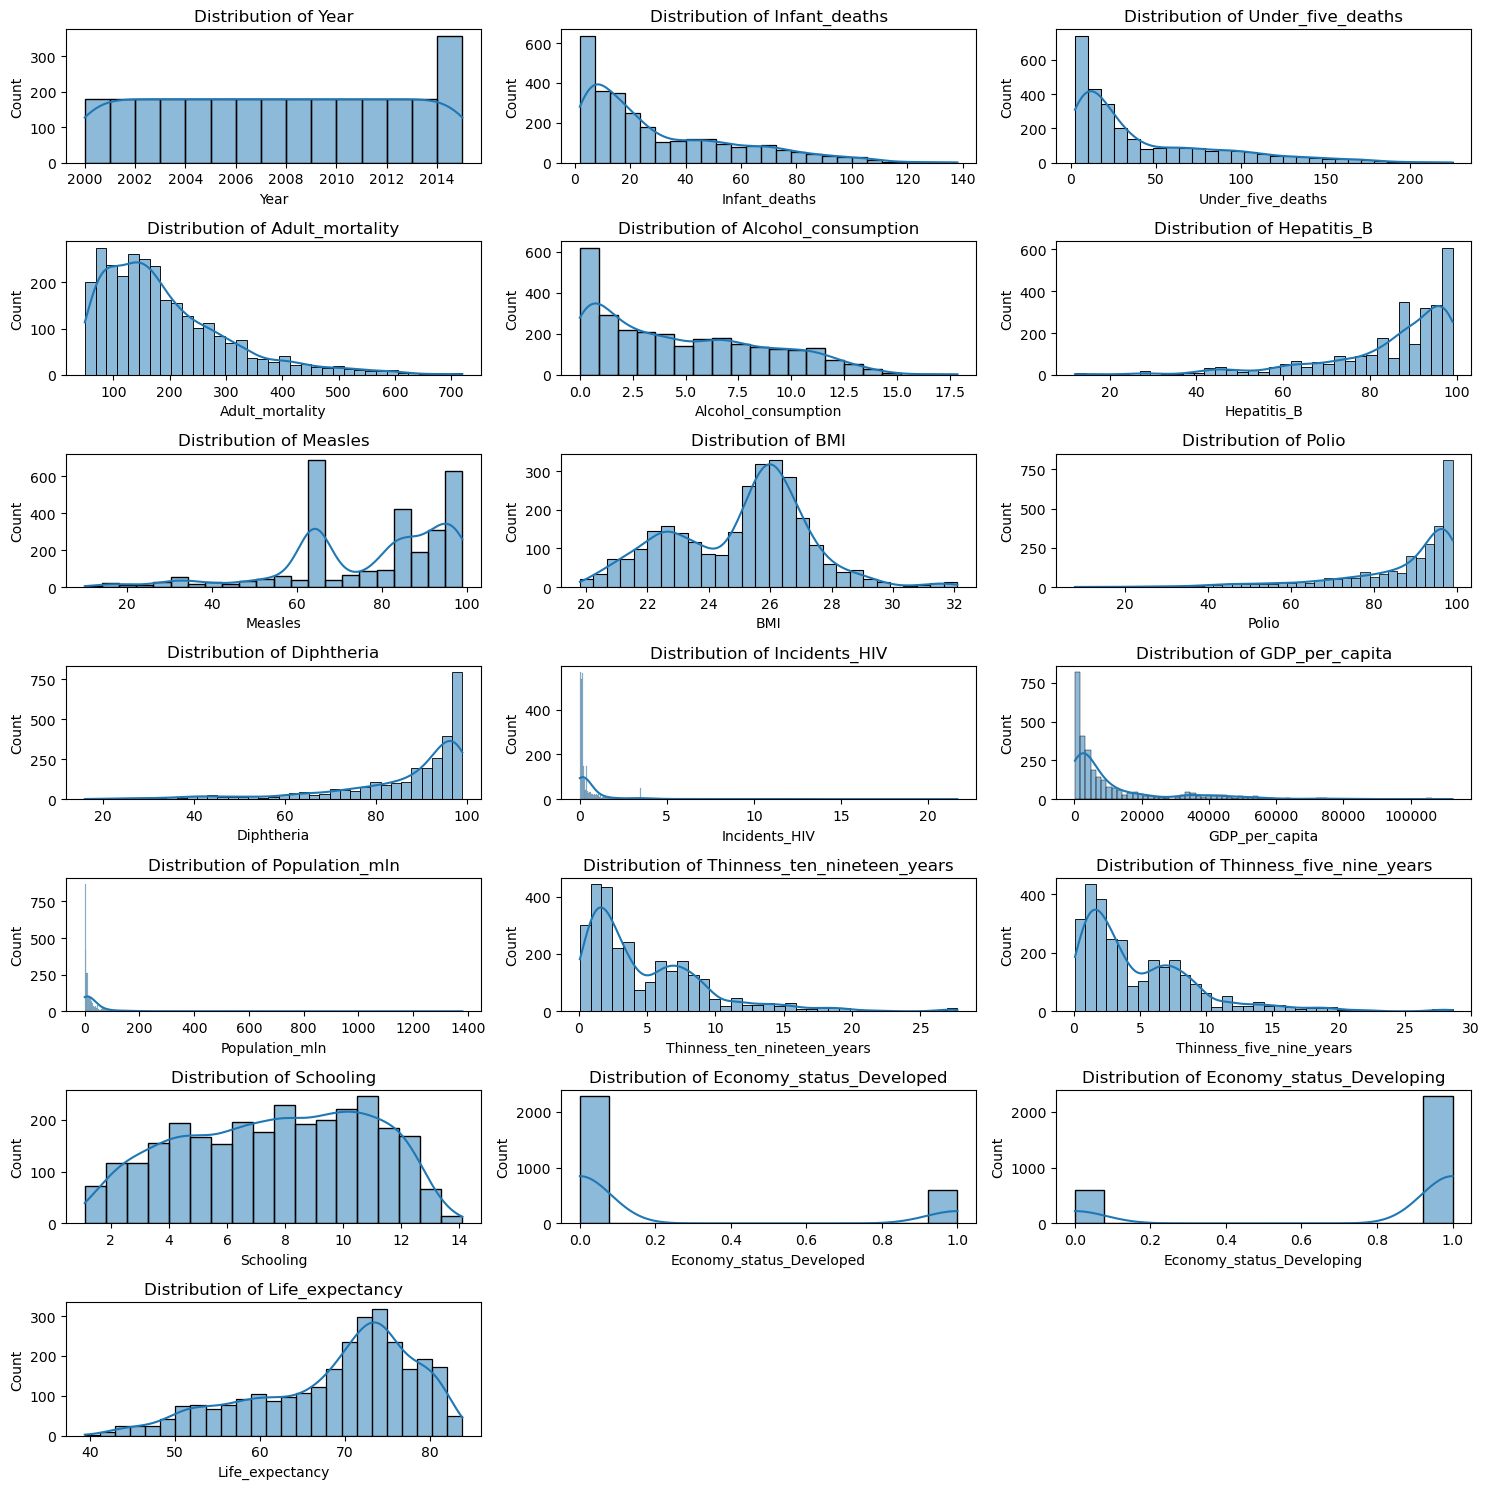

In [5]:
# Select continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64'])

# Set the number of subplots
num_plots = len(continuous_vars.columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through continuous variables and create histograms
for i, col in enumerate(continuous_vars.columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove any empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

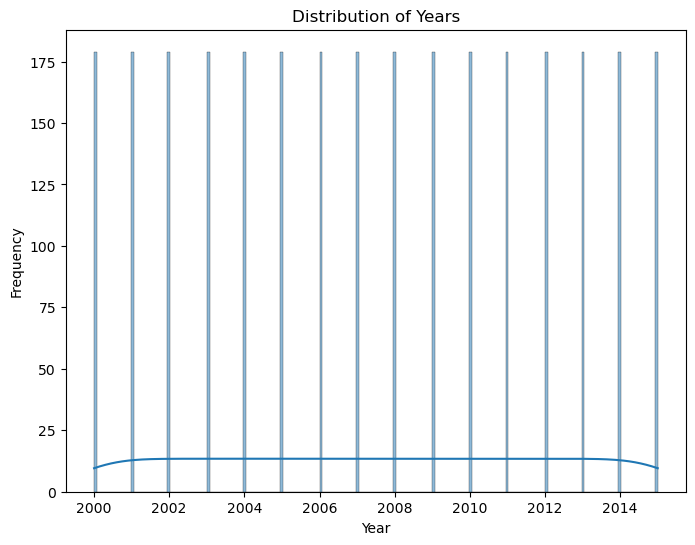

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the "Year" variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Year', bins=200, kde=True)
plt.title("Distribution of Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()


In [12]:
year_counts = df['Year'].value_counts().sort_index()
print(year_counts)


2000    179
2001    179
2002    179
2003    179
2004    179
2005    179
2006    179
2007    179
2008    179
2009    179
2010    179
2011    179
2012    179
2013    179
2014    179
2015    179
Name: Year, dtype: int64


## Answering Questions
 1.	Where are the strongest correlations with life expectancy and other variables such as, vaccinations, bmi etc.. 
     So far, there seems to be a strong correlation with life expectancy and education although a confounding variable is probabaly to blame but this will be pursued further with a regression analysis. 
2.	Where are the positive trends in life expectancy over time? Countries, regions etcc. 
    not yet answered
3.	What are the hotspots with low mortality or downward trends?
not yet answered
4.	Where are the positive trends with regards to other variables that are strongly correlated with life expectancy? 
not yet answered


## Froming Hypothesis
I would hypothesize that regression analysis and k-cluste mean analysis along with grouping of certain countries would show positive stronger correlations between vaccines such as polio etcc. And can be greate predicters of life expectancy just like education. 